#### Pairs trading is a trading strategy that long an equity and short an equity that these two have strong correltion. What we will do is to 
1. Find two equities with high correlation(normally higher than 0.8, but we could change it later)
2. We long the undervalue equity and short the overvalue one. 

In [1]:
%pip install statsmodels
%pip install scipy
%pip install pandas 
%pip install numpy
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\user\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (1.26.4)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sn
from matplotlib.pyplot import figure

In [3]:
def get_historical_data(tickers, start_date, end_date):
    data = pd.DataFrame()

    for ticker in tickers:
        try:
            df = yf.Ticker(ticker).history(start=start_date, end=end_date)
            df = df[['Close']].reset_index()
            df = df.rename(columns={'Close': ticker})
            df['Date'] = pd.to_datetime(df['Date']).dt.date  # Keep only the date part
            df = df.set_index('Date') # Set 'Date' as the index again, if desired

            data = pd.concat([data, df], axis=1)

        except:
            print(f"{ticker} does not have price data.")

    return data


cyrpto_ticks = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'XRP-USD', 'ADA-USD', 'DOGE-USD', 'ETC-USD', 'XLM-USD', 'AAVE-USD', 'EOS-USD', 'XTZ-USD', 'ALGO-USD', 'XMR-USD', 'KCS-USD',
         'MKR-USD', 'BSV-USD', 'RUNE-USD', 'DASH-USD', 'KAVA-USD', 'ICX-USD', 'WAXP-USD', 'LSK-USD', 'EWT-USD', 'HIVE-USD', 'FTX-USD', 'RVN-USD', 'SXP-USD']

start_date = "2024-01-01"
# end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
end_date = "2024-12-31"
data = get_historical_data(cyrpto_ticks, start_date, end_date)
data.tail()



,BTC-USD,ETH-USD,BNB-USD,XRP-USD,ADA-USD,DOGE-USD,ETC-USD,XLM-USD,AAVE-USD,EOS-USD,...,DASH-USD,KAVA-USD,ICX-USD,WAXP-USD,LSK-USD,EWT-USD,HIVE-USD,FTX-USD,RVN-USD,SXP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-26,95795.515625,3331.225830,688.360107,2.154339,0.859785,0.312256,25.832432,0.354258,337.297516,0.785107,...,40.628208,0.445024,0.173302,0.040494,0.909231,1.440343,0.346824,0.001122,0.020911,0.295074
2024-12-27,94164.859375,3328.916992,690.429382,2.141650,0.874768,0.311036,25.926815,0.349264,323.264801,0.782510,...,39.211594,0.454937,0.179473,0.040823,0.923008,1.537851,0.323185,0.001229,0.020815,0.298668
2024-12-28,95163.929688,3397.902344,720.959045,2.180824,0.887817,0.323919,26.535089,0.355666,353.539520,0.806986,...,43.174164,0.482654,0.189592,0.043940,0.977027,1.511003,0.354533,0.001143,0.021697,0.314635
2024-12-29,93530.226562,3349.513428,693.754517,2.093180,0.858640,0.314320,25.527992,0.337898,332.002838,0.775917,...,39.738312,0.467406,0.178006,0.041708,0.939160,1.384246,0.402348,0.001230,0.020533,0.297462
2024-12-30,92643.210938,3356.392578,704.146301,2.057571,0.860017,0.313514,25.412146,0.331735,321.680542,0.773260,...,38.551167,0.457640,0.190276,0.041427,0.934227,1.332369,0.363176,0.001131,0.020492,0.356349


In [4]:
# check if the data has na
print(data.isna().sum())

BTC-USD     0
ETH-USD     0
BNB-USD     0
XRP-USD     0
ADA-USD     0
DOGE-USD    0
ETC-USD     0
XLM-USD     0
AAVE-USD    0
EOS-USD     0
XTZ-USD     0
ALGO-USD    0
XMR-USD     0
KCS-USD     0
MKR-USD     0
BSV-USD     0
RUNE-USD    0
DASH-USD    0
KAVA-USD    0
ICX-USD     0
WAXP-USD    0
LSK-USD     0
EWT-USD     0
HIVE-USD    0
FTX-USD     0
RVN-USD     0
SXP-USD     0
dtype: int64


In [5]:
cleaned_data = data.dropna(axis = 1)
cleaned_data.isna().sum()

BTC-USD     0
ETH-USD     0
BNB-USD     0
XRP-USD     0
ADA-USD     0
DOGE-USD    0
ETC-USD     0
XLM-USD     0
AAVE-USD    0
EOS-USD     0
XTZ-USD     0
ALGO-USD    0
XMR-USD     0
KCS-USD     0
MKR-USD     0
BSV-USD     0
RUNE-USD    0
DASH-USD    0
KAVA-USD    0
ICX-USD     0
WAXP-USD    0
LSK-USD     0
EWT-USD     0
HIVE-USD    0
FTX-USD     0
RVN-USD     0
SXP-USD     0
dtype: int64

Find the correlation between different equities and choose which pair are the best

In [6]:
corr_matrix = cleaned_data.corr()
corr_matrix

,BTC-USD,ETH-USD,BNB-USD,XRP-USD,ADA-USD,DOGE-USD,ETC-USD,XLM-USD,AAVE-USD,EOS-USD,...,DASH-USD,KAVA-USD,ICX-USD,WAXP-USD,LSK-USD,EWT-USD,HIVE-USD,FTX-USD,RVN-USD,SXP-USD
BTC-USD,1.000000,0.636846,0.829898,0.788498,0.684282,0.932207,0.404410,0.773007,0.781839,0.349204,...,0.582788,-0.112707,0.029511,-0.017541,-0.014706,-0.239334,0.059601,0.200744,0.300153,0.272577
ETH-USD,0.636846,1.000000,0.589443,0.409657,0.562728,0.571334,0.783036,0.442841,0.273826,0.662589,...,0.635693,0.408827,0.487012,0.494698,0.492724,0.437312,0.485237,0.338676,0.639634,0.563136
BNB-USD,0.829898,0.589443,1.000000,0.468579,0.262379,0.640313,0.183363,0.420815,0.528828,0.114592,...,0.308894,-0.283553,-0.150934,-0.134170,-0.048053,-0.170012,-0.146726,-0.143454,0.290079,0.009412
XRP-USD,0.788498,0.409657,0.468579,1.000000,0.855006,0.840293,0.405673,0.940718,0.895228,0.462491,...,0.751332,-0.011838,0.107936,-0.002041,-0.076145,-0.222653,0.168035,0.513387,0.163374,0.282883
ADA-USD,0.684282,0.562728,0.262379,0.855006,1.000000,0.826103,0.732792,0.909606,0.677680,0.768497,...,0.892971,0.426598,0.524167,0.418301,0.308476,0.066648,0.550256,0.693562,0.438228,0.686150
DOGE-USD,0.932207,0.571334,0.640313,0.840293,0.826103,1.000000,0.503026,0.876973,0.750838,0.474301,...,0.681756,0.036144,0.163278,0.094588,0.065093,-0.186684,0.189207,0.339442,0.348573,0.420843
ETC-USD,0.404410,0.783036,0.183363,0.405673,0.732792,0.503026,1.000000,0.495328,0.206169,0.949228,...,0.823909,0.801698,0.857022,0.829606,0.785394,0.579078,0.841176,0.618952,0.810058,0.891203
XLM-USD,0.773007,0.442841,0.420815,0.940718,0.909606,0.876973,0.495328,1.000000,0.774615,0.525746,...,0.760131,0.088441,0.204547,0.099567,0.026955,-0.153228,0.235259,0.492522,0.241218,0.399081
AAVE-USD,0.781839,0.273826,0.528828,0.895228,0.677680,0.750838,0.206169,0.774615,1.000000,0.262306,...,0.581275,-0.173593,-0.049217,-0.151850,-0.236768,-0.424810,0.027766,0.389981,0.030148,0.142372
EOS-USD,0.349204,0.662589,0.114592,0.462491,0.768497,0.474301,0.949228,0.525746,0.262306,1.000000,...,0.901037,0.842796,0.905479,0.858609,0.784776,0.539398,0.887807,0.718104,0.800030,0.917357


Turn the correlation into heatmap, which is easier to see.

<AxesSubplot: >

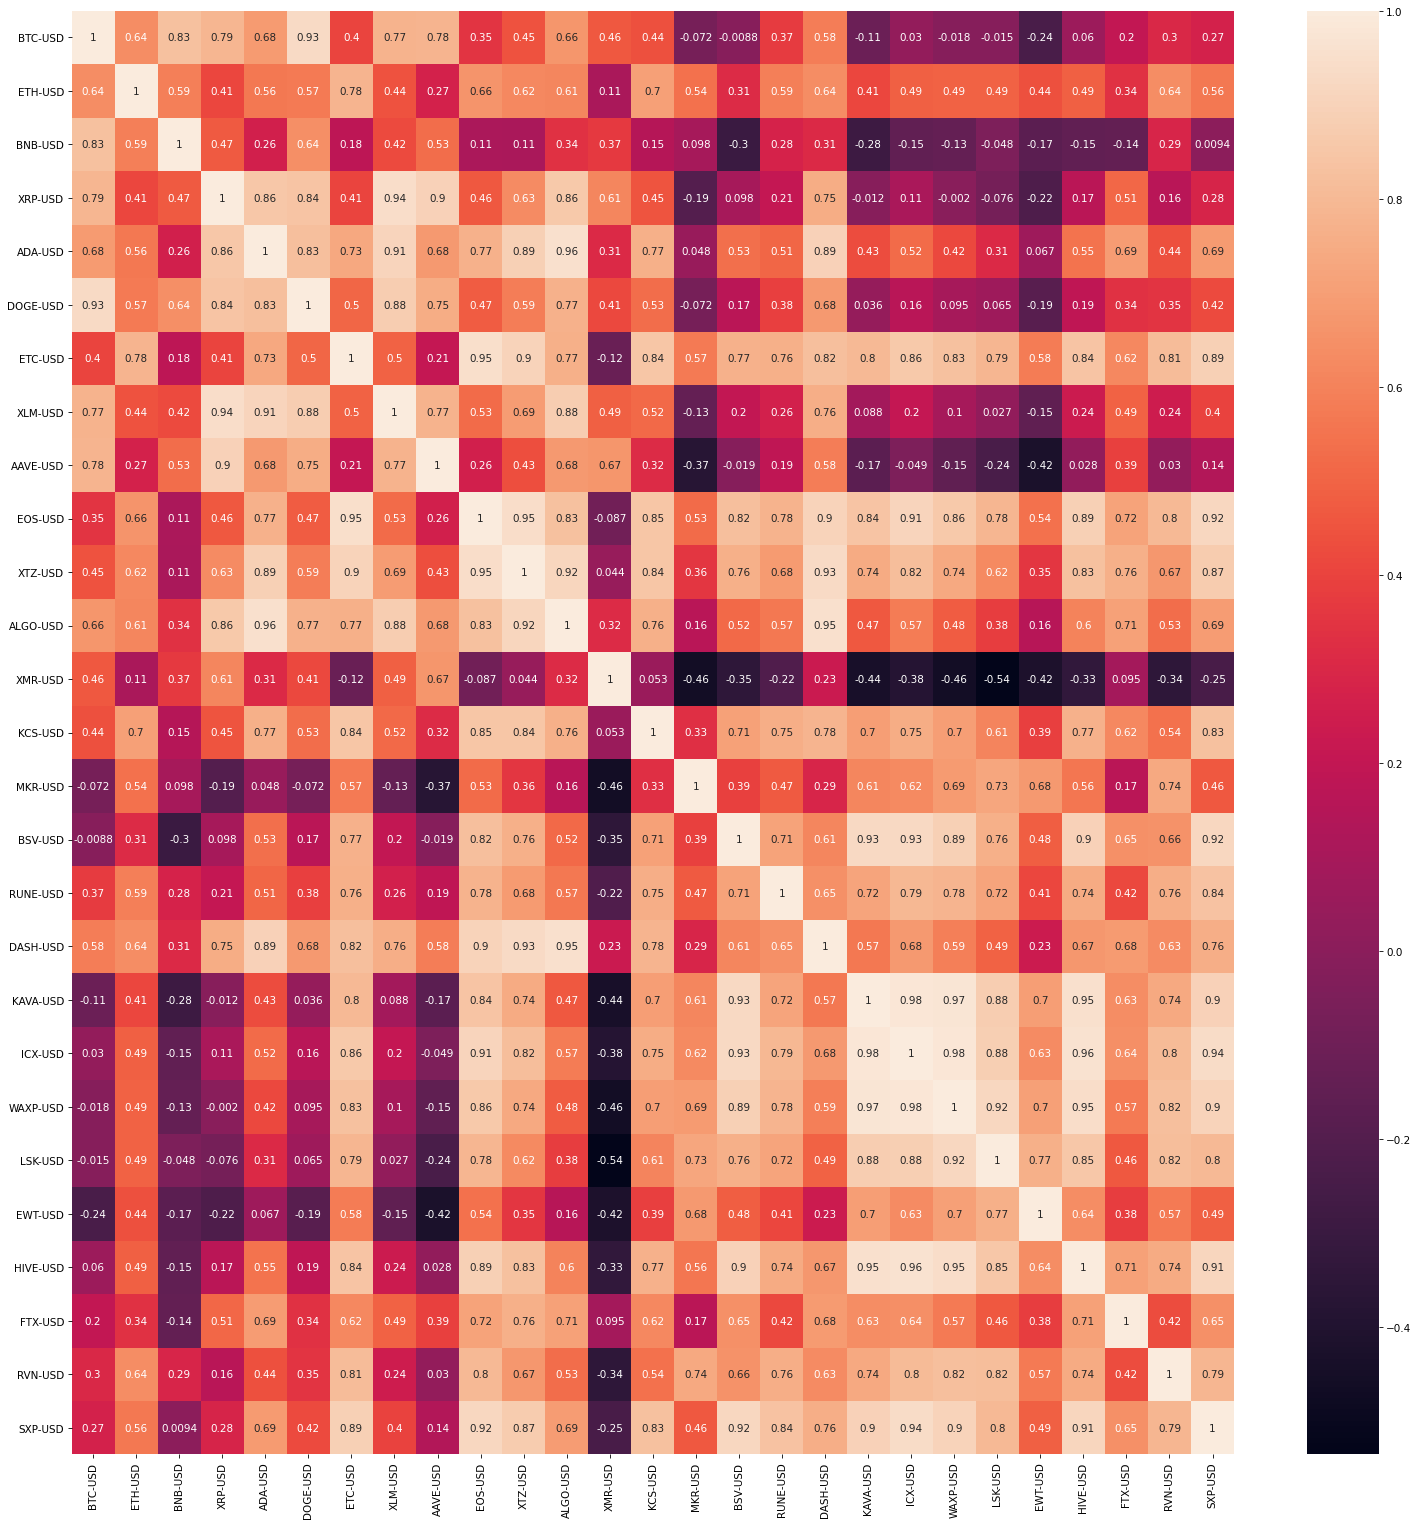

In [7]:
figure(figsize = (25, 25), dpi = 75)
sn.heatmap(corr_matrix, annot = True)

In [8]:
def get_high_correlation_pairs(correlation_matrix, threshold=0.93):
    """
    Find pairs of tickers with correlation above a specified threshold.
    
    Parameters:
    -----------
    correlation_matrix : pandas.DataFrame
        Correlation matrix of stock prices
    threshold : float, optional (default=0.95)
        Minimum correlation value to consider a pair
    
    Returns:
    --------
    list of tuples
        List of ticker pairs with correlation above the threshold
    """
    # Create an empty list to store highly correlated pairs
    high_corr_pairs = []
    
    # Iterate through the correlation matrix 
    # Use upper triangle to avoid duplicate pairs and self-correlations
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            # Get ticker names
            ticker1 = correlation_matrix.columns[i]
            ticker2 = correlation_matrix.columns[j]
            
            # Get correlation value
            corr_value = correlation_matrix.iloc[i, j]
            
            # Check if correlation is above threshold
            if abs(corr_value) >= threshold:
                high_corr_pairs.append((ticker1, ticker2, corr_value))
    
    # Sort pairs by correlation in descending order
    high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    return high_corr_pairs

# Example usage
high_correlation_pairs = get_high_correlation_pairs(corr_matrix)

pairs = []
# Print the results
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.4f}")
    pairs.append([pair[0], pair[1]])

print(pairs)


ICX-USD and WAXP-USD: Correlation = 0.9802
KAVA-USD and ICX-USD: Correlation = 0.9780
KAVA-USD and WAXP-USD: Correlation = 0.9736
ICX-USD and HIVE-USD: Correlation = 0.9619
ADA-USD and ALGO-USD: Correlation = 0.9555
KAVA-USD and HIVE-USD: Correlation = 0.9526
ALGO-USD and DASH-USD: Correlation = 0.9524
ETC-USD and EOS-USD: Correlation = 0.9492
EOS-USD and XTZ-USD: Correlation = 0.9460
WAXP-USD and HIVE-USD: Correlation = 0.9458
XRP-USD and XLM-USD: Correlation = 0.9407
ICX-USD and SXP-USD: Correlation = 0.9390
BTC-USD and DOGE-USD: Correlation = 0.9322
[['ICX-USD', 'WAXP-USD'], ['KAVA-USD', 'ICX-USD'], ['KAVA-USD', 'WAXP-USD'], ['ICX-USD', 'HIVE-USD'], ['ADA-USD', 'ALGO-USD'], ['KAVA-USD', 'HIVE-USD'], ['ALGO-USD', 'DASH-USD'], ['ETC-USD', 'EOS-USD'], ['EOS-USD', 'XTZ-USD'], ['WAXP-USD', 'HIVE-USD'], ['XRP-USD', 'XLM-USD'], ['ICX-USD', 'SXP-USD'], ['BTC-USD', 'DOGE-USD']]


Based on the heatmap, we can see some pairs of the crypto have high correlation, so we choose randomly and test their stationarity and cointegration.  

## Take the cointegration test
See if the pairs we found pass the cointegration test. 

0.0283407212170216 is the pvalue
ALGO-USD and DASH-USD are cointegrated



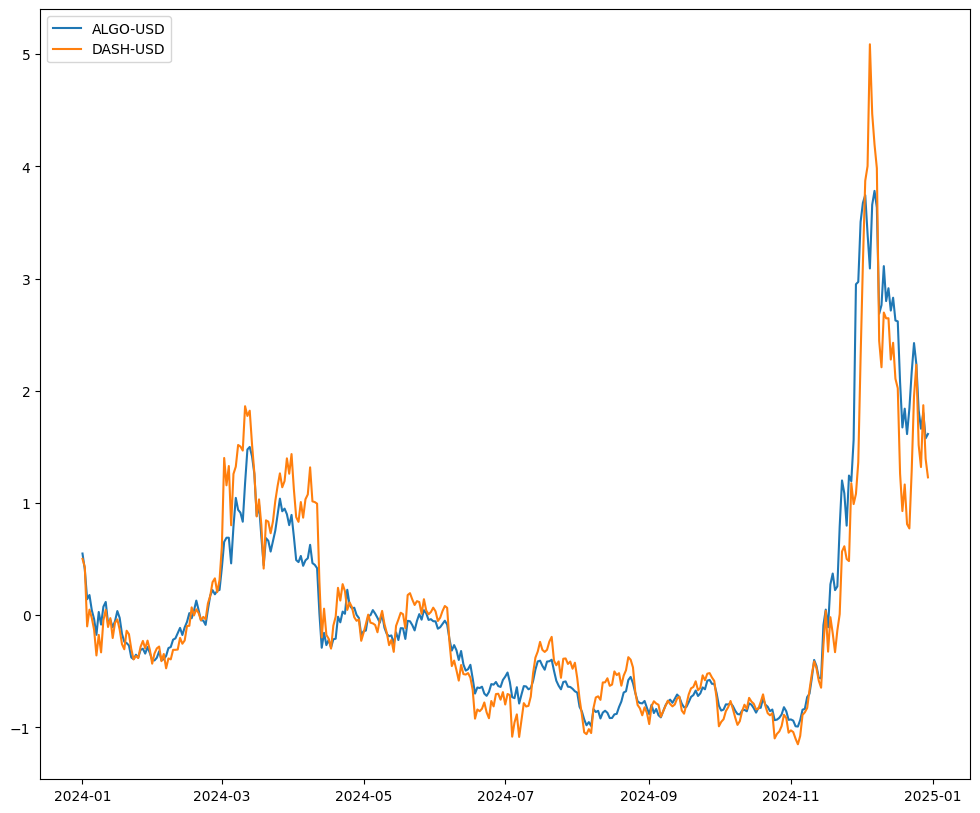

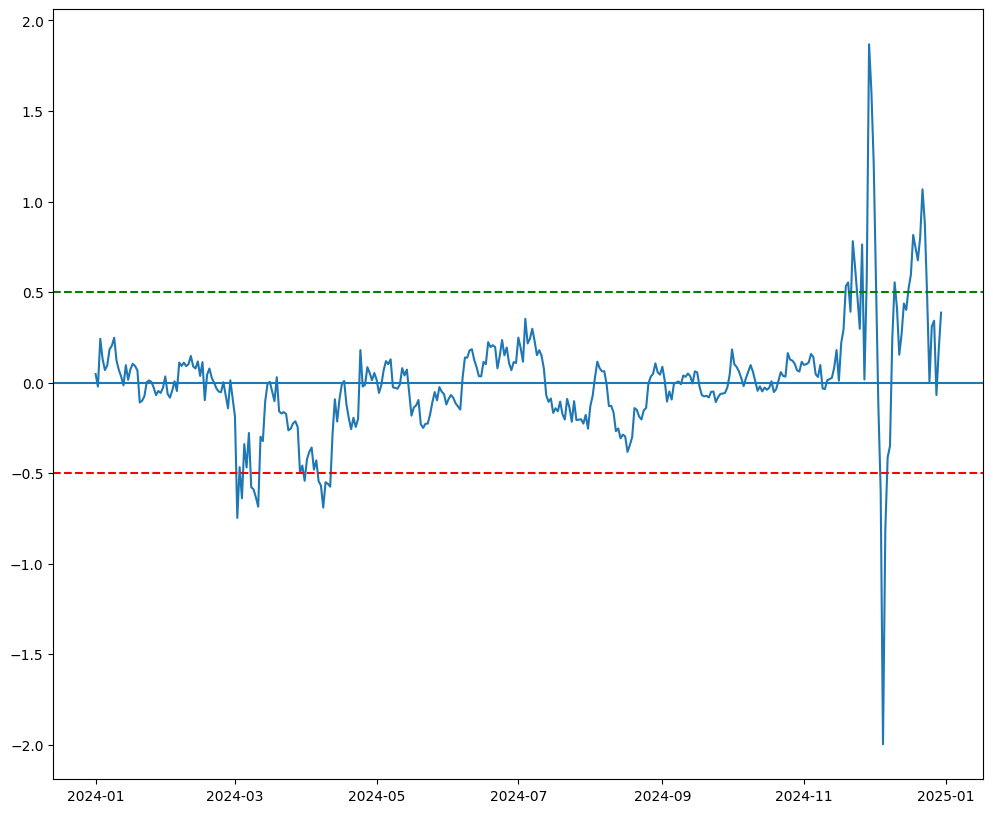

9.385770281157395e-06 is the pvalue
ETC-USD and EOS-USD are cointegrated



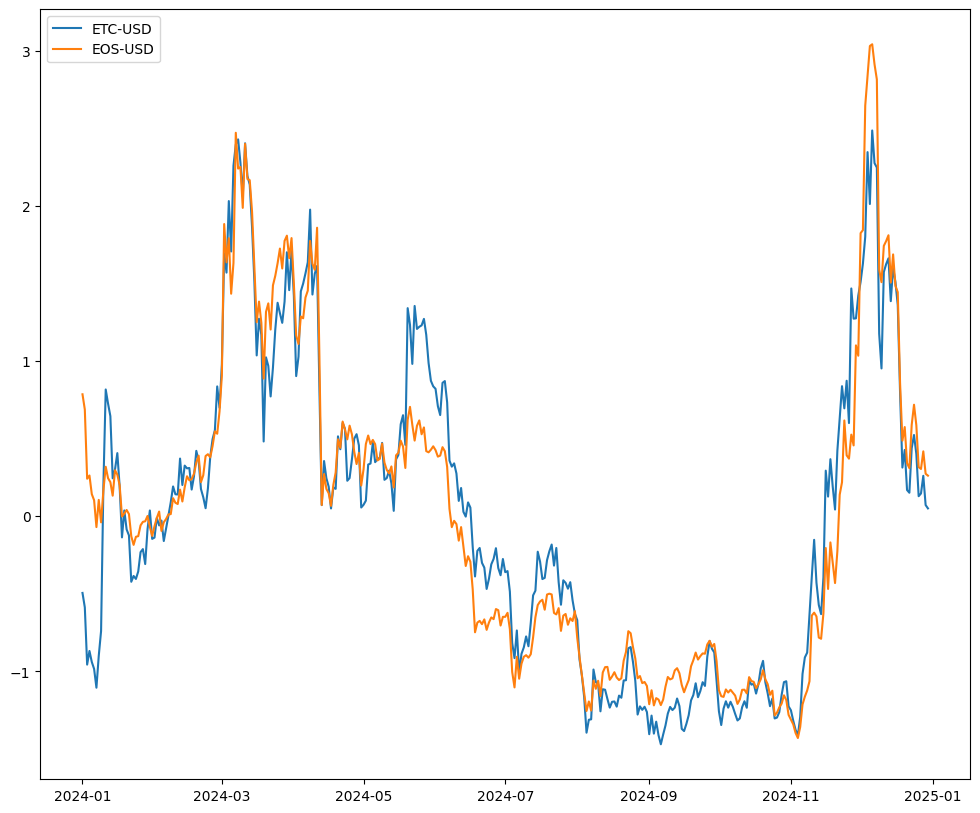

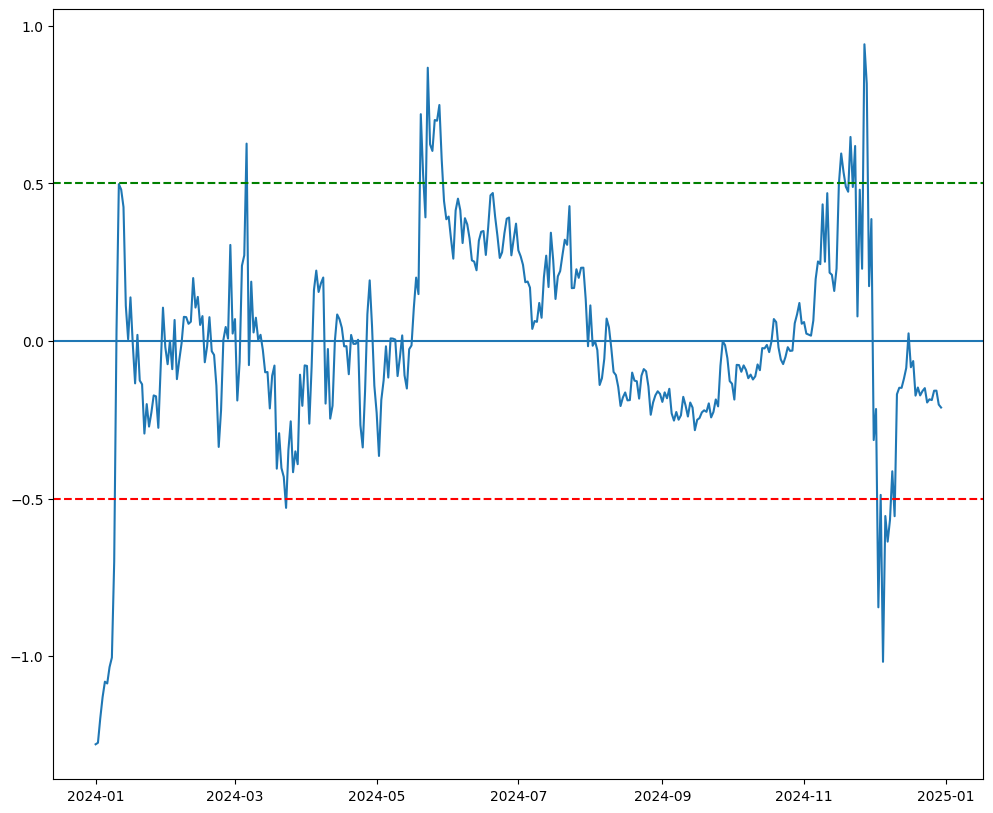

0.006381291955844931 is the pvalue
XRP-USD and XLM-USD are cointegrated



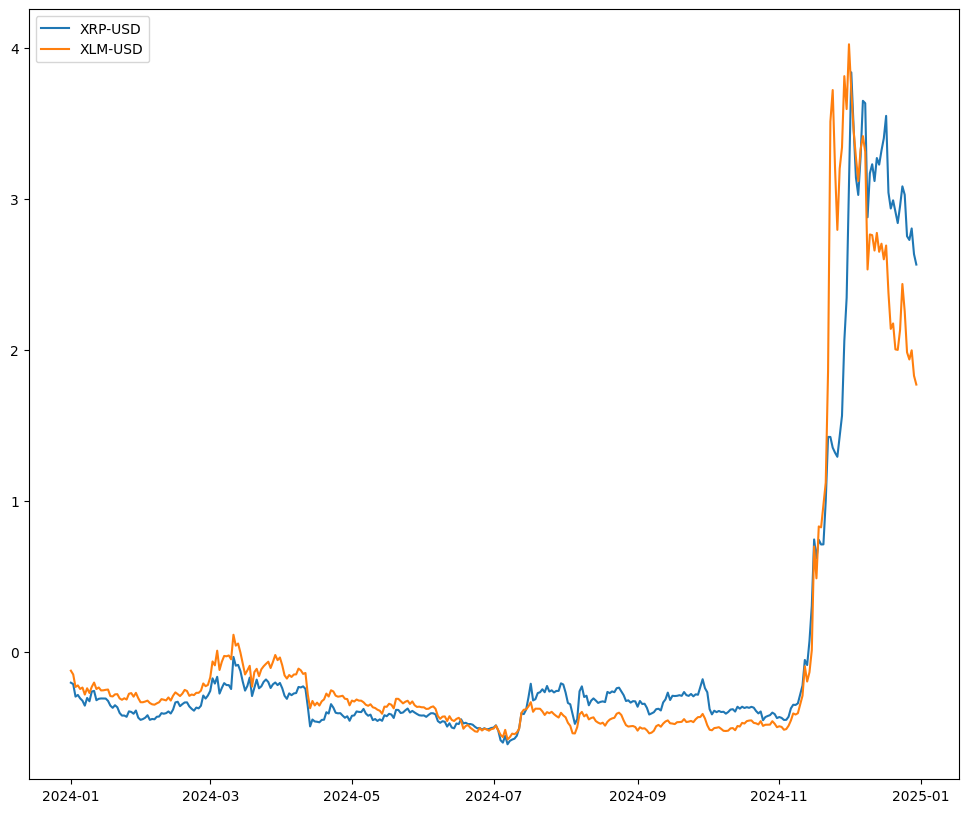

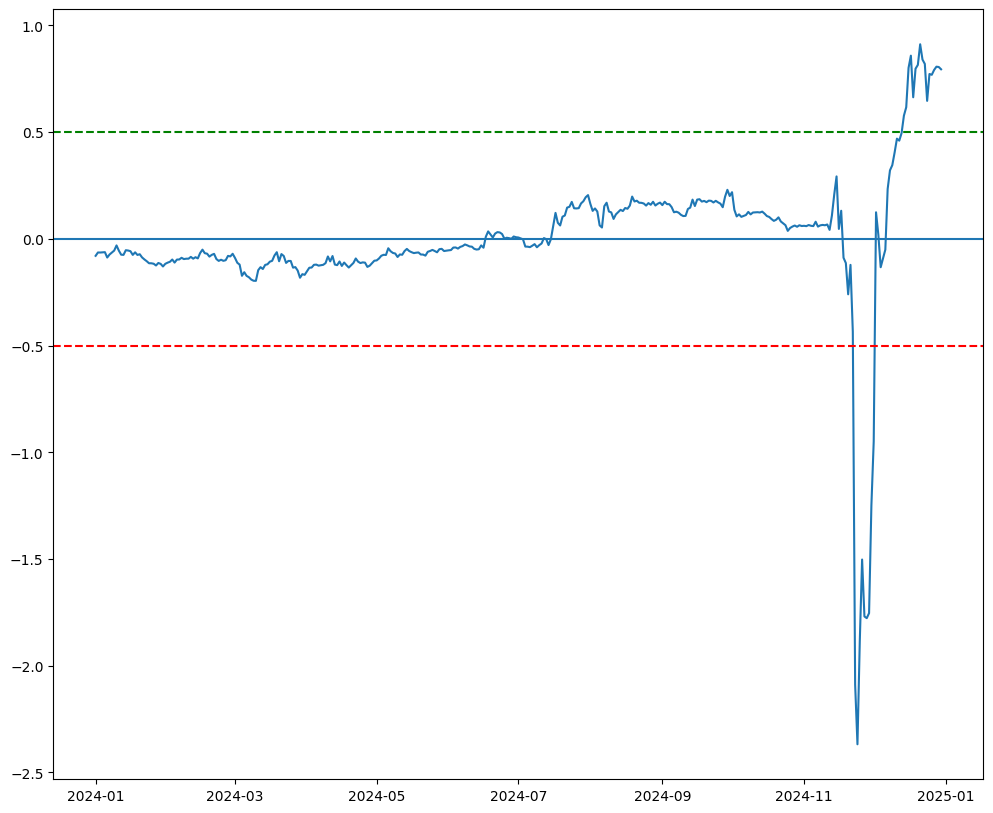

There are 3 pass the cointegration test


In [9]:
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from scipy import stats

coin_pairs = []
def testcointegration(stock1, stock2):
    Stock1 = data[stock1]
    Stock2 = data[stock2]

    adj_stock1 = stats.zscore(Stock1)
    adj_stock2 = stats.zscore(Stock2)

    # Cointegration test: A technique used to find a potential correlation in a time series 
    # Determines if the spread between the two assets are constant over time.
    # Null Hypothesis: Spread between series are non-stationary.
    # Uses the augmented Engle-Granger two-step cointegration test.
    result = ts.coint(adj_stock1, adj_stock2)
    
    
    if result[1] < 0.05:
        print(f'{result[1]} is the pvalue')
        print(f"{stock1} and {stock2} are cointegrated\n")
        coin_pairs.append([stock1, stock2])

        figure(figsize = (12, 10), dpi = 100)
        plt.plot(adj_stock1, label = f"{stock1}")
        plt.plot(adj_stock2, label = f"{stock2}")
        plt.legend()

        figure(figsize = (12, 10), dpi = 100)
        spread = adj_stock1 - adj_stock2
        plt.plot(spread, label = "spread")
        plt.axhline(np.mean(spread))
        plt.axhline(-0.5, color = 'red', linestyle = "--")
        plt.axhline(0.5, color = 'green', linestyle = "--")
        plt.show()


for i in range(len(pairs)-1):
        testcointegration(pairs[i][0], pairs[i][1])

print(f"There are {len(coin_pairs)} pass the cointegration test")


#### There are other cointegration test that we could use, if we want our pairs be more precise, then we could add other test. 

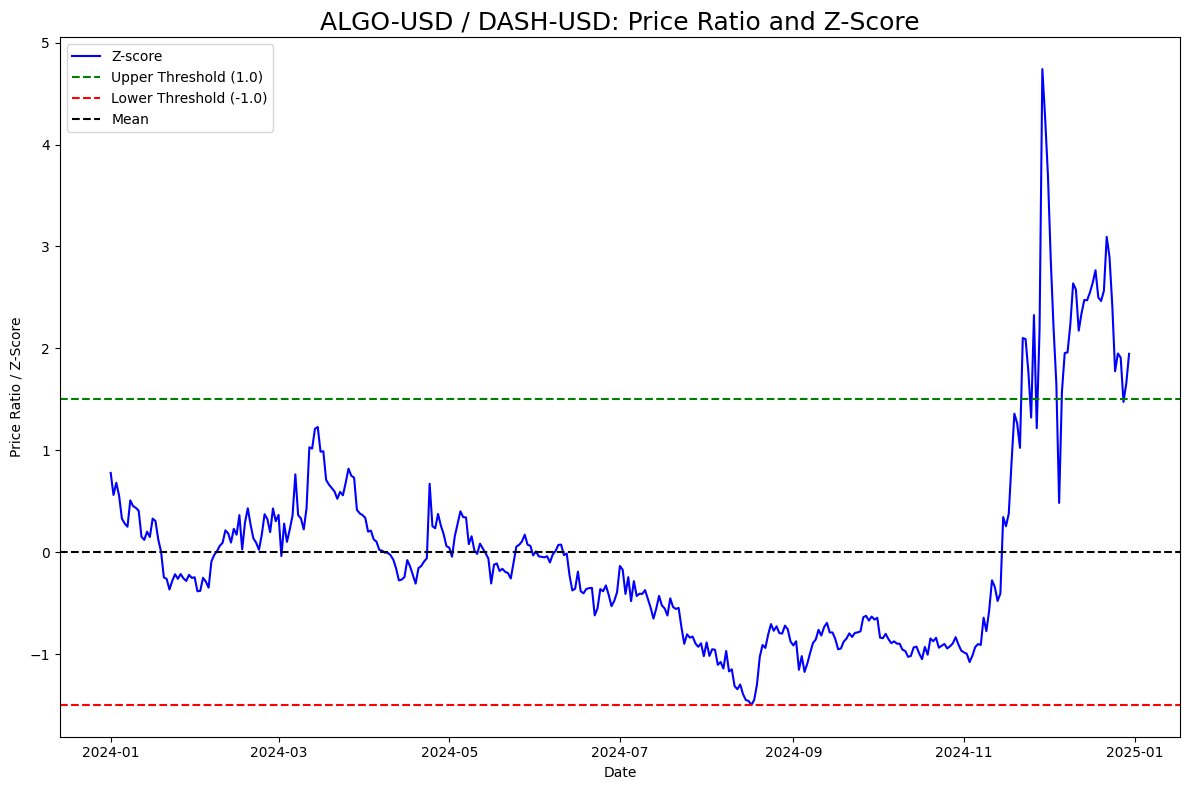

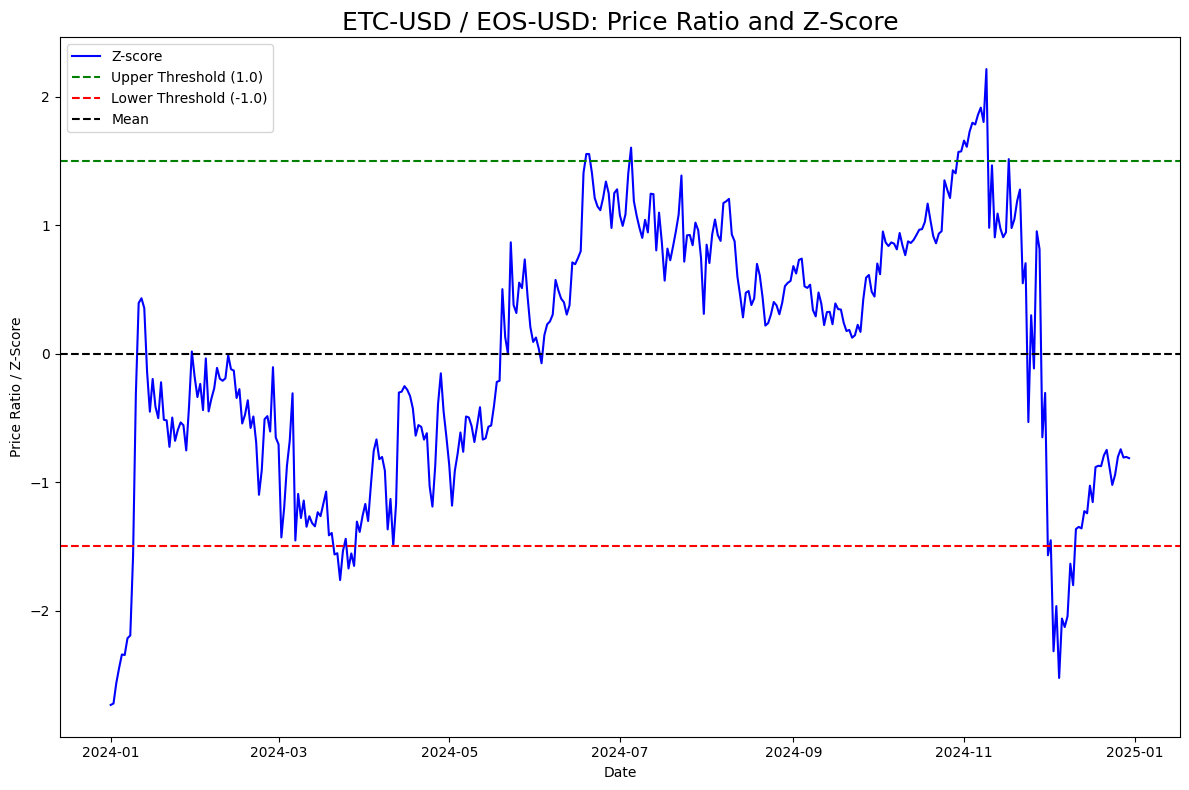

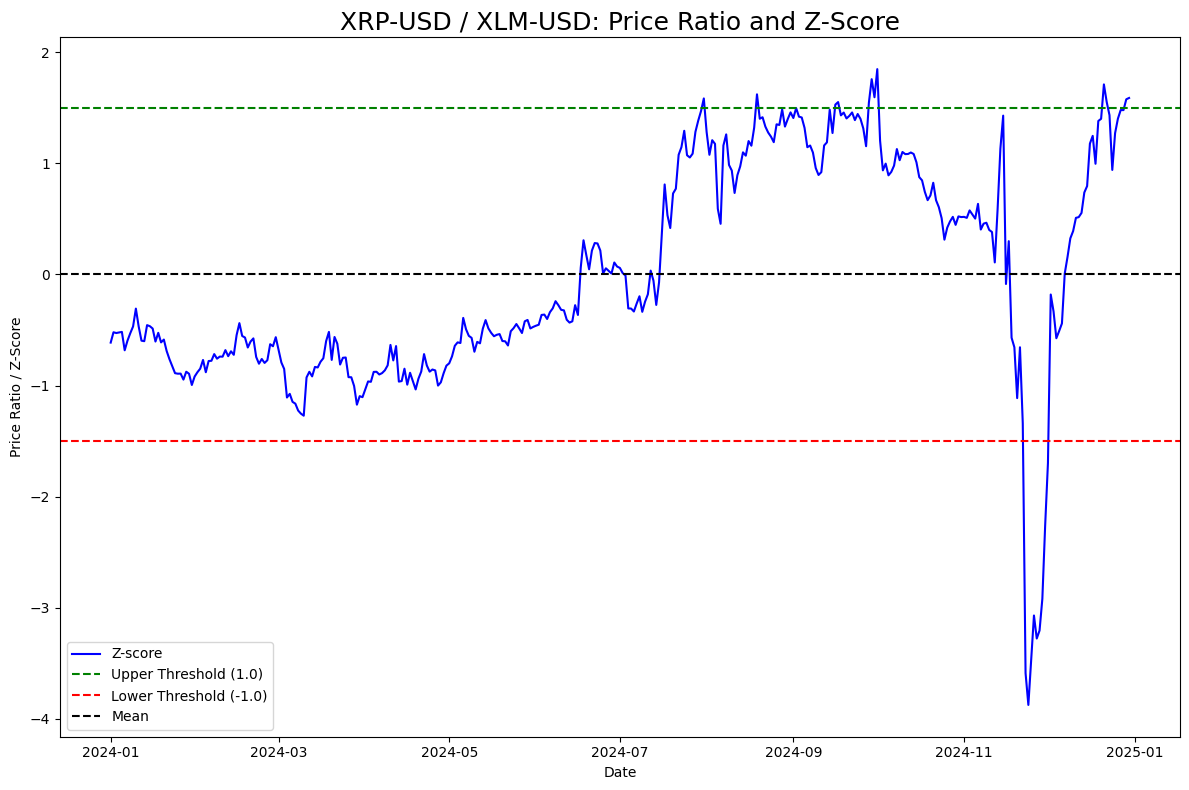

In [10]:
# Calculate price ratio 
def priceratio_z(stock1, stock2):
    ratios = data[stock1] / data[stock2]
    ratios_mean = np.mean(ratios)
    ratios_std = np.std(ratios)
    ratios_z = (ratios - ratios_mean) / ratios_std
    
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.plot(ratios.index, ratios_z, label = "Z-score", color = 'blue')
    ax.axhline(1.5, color="green", linestyle='--', label="Upper Threshold (1.0)") # where we should short the stock1 and buy stock2 
    ax.axhline(-1.5, color="red", linestyle='--', label="Lower Threshold (-1.0)") # where we should buy the stock1 and short stock2
    ax.axhline(0, color="black", linestyle='--', label="Mean")
    ax.set_title(f'{stock1} / {stock2}: Price Ratio and Z-Score', fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price Ratio / Z-Score')
    ax.legend()
    plt.tight_layout()
    plt.show()

for i in range(len(coin_pairs)):
    priceratio_z(coin_pairs[i][0], coin_pairs[i][1])


In [11]:
# Back test the signal and see if this really work or not. 
def signals_zscore_evolution(ticker1, ticker2, zscore, window_size=15, first_ticker=True):
    """
    Generate trading signals based on z-score analysis of the ratio between two time series.
    Parameters:
    - ticker1 (pandas.Series): Time series data for the first security.
    - ticker2 (pandas.Series): Time series data for the second security.
    - window_size (int): The window size for calculating z-scores and ratios' statistics.
    - first_ticker (bool): Set to True to use the first ticker as the primary signal source, and False to use the second.Returns:
    - signals_df (pandas.DataFrame): A DataFrame with 'signal' and 'orders' columns containing buy (1) and sell (-1) signals.
    """
    ticker1 = data[ticker1]
    ticker2 = data[ticker2]
    ratios = ticker1 / ticker2 
    ratios_mean = ratios.rolling(window = window_size, min_periods = 1, center = False).mean()
    ratios_std  = ratios.rolling(window = window_size, min_periods = 1, center = False).std()
    z_score = (ratios - ratios_mean) / ratios_std

    buy = ratios.copy()
    sell = ratios.copy()

    # setting signal for pairs trading, we should sell stock1, buy stock2 if we see z-score > 1
    # vice versa when z-score < 1 
    if first_ticker:
        # These are empty zones, where there should be no signal
        # the rest is signalled by the ratio.
        buy[z_score > -zscore] = 0 
        sell[z_score < zscore] = 0
    else:
        buy[z_score < zscore] = 0
        sell[z_score > zscore] = 0


    signals_df = pd.DataFrame(index=ticker1.index)
    signals_df['zscore'] = z_score
    signals_df['signal'] = np.where(buy > 0, 1, np.where(sell < 0, -1, 0))
    signals_df['signal'][0] = 0
    signals_df['orders'] = signals_df['signal'].diff()
    signals_df.loc[signals_df['orders'] == 0, 'orders'] = None

    # print(signals_df.to_string())

    return signals_df

In [12]:
# Calculate the profit

def calculate_profit(signals, stock1_prices, stock2_prices):
    """
    Calculate cumulative profit based on trading signals and stock prices.
    Parameters:
    - signals (pandas.DataFrame): A DataFrame containing trading signals (1 for buy, -1 for sell).
    - prices (pandas.Series): A Series containing stock prices corresponding to the signal dates.
    Returns:
    - cum_profit (pandas.Series): A Series containing cumulative profit over time.
    """
    profit = pd.DataFrame(index=stock1_prices.index)
    profit['ticker1_profit'] = 0.0
    profit['ticker2_profit'] = 0.0
    profit['cum_profit'] = 0.0

    buys = signals[signals['orders'] == 1].index
    sells = signals[signals['orders'] == -1].index

    if len(buys) == 0 or len(sells) == 0:
        # no actions taken
        return 0
    elif len(sells) < len(buys):
        # Assume we sell at the end
        sells = sells.append(pd.Index(stock1_prices.tail(1).index))
    elif len(sells) > len(buys):
        # Assume we buy at the end
        buys = buys.append(pd.Index(stock1_prices.tail(1).index))

    buy1_prices = stock1_prices.loc[buys]
    sell1_prices = stock1_prices.loc[sells]
    buy2_prices = stock2_prices.loc[buys]
    sell2_prices = stock2_prices.loc[sells]

    profit.loc[sells, 'ticker1_profit'] = np.round((sell1_prices.values - buy1_prices.values), 2)
    profit['ticker1_profit'] = profit['ticker1_profit'].fillna(0)
    
    profit.loc[sells, 'ticker2_profit'] = np.round(((-sell2_prices.values) + buy2_prices.values), 2)
    profit['ticker2_profit'] = profit['ticker2_profit'].fillna(0)
    
    # Make profit cumulative
    profit['cum_profit'] = profit['ticker1_profit'].cumsum() + profit['ticker2_profit'].cumsum()
    
    # print(profit.to_string())
    return profit


In [13]:
def plot_strategy(prices_df, signal_df, profit):
    """
    Plot a trading strategy with buy and sell signals and cumulative profit.
    Parameters:
    - prices (pandas.Series): A Series containing stock prices.
    - signals (pandas.DataFrame): A DataFrame with buy (1) and sell (-1) signals.
    - profit (pandas.Series): A Series containing cumulative profit over time.
    Returns:
    - ax1 (matplotlib.axes.Axes): The top subplot displaying stock prices and signals.
    - ax2 (matplotlib.axes.Axes): The bottom subplot displaying cumulative profit.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': (3, 1)},
                                   figsize=(18, 12))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price in $')
    ax1.plot(prices_df.index, prices_df, color='g', lw=0.25)

    # Plot the Buy and Sell signals
    ax1.plot(signal_df.loc[signal_df.orders == 1.0].index,
             prices_df[signal_df.orders == 1.0],
             '^', markersize=12, color='blue', label='Buy')
    ax1.plot(signal_df.loc[signal_df.orders == -1.0].index,
             prices_df[signal_df.orders == -1.0],
             'v', markersize=12, color='red', label='Sell')

    ax2.plot(profit.index, profit, color='b')
    ax2.set_ylabel('Cumulative Profit(%)')
    ax2.set_xlabel('Date')

    return ax1, ax2

In [14]:
def Returns(signals, price_1, price_2, year):
    """
    Calculate key return metrics for backtesting using profits from calculate_profit.

    Parameters:
    - signals (pandas.DataFrame): DataFrame containing trading signals (1 for buy, -1 for sell).
    - prices (pandas.Series): Series containing stock prices corresponding to the signal dates.
    - year (float): Number of years in the backtesting period.

    Returns:
    - A dictionary containing total return, annualized return, and average profit per trade.
    """
    # Use calculate_profit to get cumulative profits
    profit = calculate_profit(signals, price_1, price_2)

    total_profit = np.round((profit['cum_profit'].iloc[-1] - profit['cum_profit'].iloc[0]), 3) # ROI
    
    if total_profit < 0:
        annual_profit = -(np.round(((1.0 + abs(total_profit))**(1.0/year)) - 1.0, 3))
    else:
        annual_profit = np.round(((1.0 + total_profit)**(1.0/year)) - 1.0, 3) # Annualized return
    
    trade_count = len(signals[signals['orders'] == 1])
    average_return = np.round(total_profit / trade_count, 3)

    print(f"總報酬: {total_profit}%")
    print(f"年化報酬: {annual_profit}%")
    print(f"平均單筆報酬金額: {average_return}")

In [15]:
# 風險相關回測數值
# 最大回檔(MDD)
# 波動率
# Sharpe Ratio
# 索丁諾比率 

def risks(signals, price_1, price_2, year, risk_free_rate = 0.0163):
    
    profit = calculate_profit(signals, price_1, price_2)

    # risk features 

    ticker1_max_loss = np.sort(profit['ticker1_profit'])[0]
    ticker2_max_loss = np.sort(profit['ticker2_profit'])[0]
    if ticker1_max_loss < ticker2_max_loss:
        max_loss_in_a_trade = ticker1_max_loss
    elif ticker2_max_loss < ticker1_max_loss:
        max_loss_in_a_trade = ticker2_max_loss
    else:
        max_loss_in_a_trade = ticker1_max_loss   
        
         
    rolling_max = profit['cum_profit'].expanding().max()
    drawdowns = profit['cum_profit'] - rolling_max
    mdd = drawdowns.min()    

    Risk_Return_Ratio = profit['cum_profit'].iloc[-1]/abs(mdd)
    Sharpe_ratio = (((profit['cum_profit'].iloc[-1])/year) - risk_free_rate) / (profit['cum_profit'].std()*np.sqrt(252)) # 問題是這裡的profit['profit']應該換成其他東西
    

    print(f"單次交易最大跌幅: {max_loss_in_a_trade}%")
    print(f"MDD: {mdd:.4}")
    print(f"風險報酬比: {Risk_Return_Ratio:.4}")
    print(f"Sharpe Ratio: {Sharpe_ratio:.4}")

In [16]:
# 勝率相關回測數值
# 勝率
# 盈虧比

def win_rate(signals, price_1, price_2):
    """
    Calculate trading performance metrics including win rate and profit ratio.
    
    Parameters:
    - signals (pandas.DataFrame): DataFrame containing trading signals (1 for buy, -1 for sell)
    - price_1 (pandas.Series): Price series for the first stock
    - price_2 (pandas.Series): Price series for the second stock
    
    Returns:
    - dict: Dictionary containing win rate and profit ratio metrics
    """
    profit = calculate_profit(signals, price_1, price_2)
    
    # Get all trade results (non-zero profits indicate actual trades)
    trades = profit[(profit['ticker1_profit'] != 0) | (profit['ticker2_profit'] != 0)]
    total_trades = len(trades)
    
    # Calculate total profit for each trade
    trade_profits = trades['ticker1_profit'] + trades['ticker2_profit']
    
    # Count winning trades (trades with positive profit)
    winning_trades = len(trade_profits[trade_profits > 0])
    
    # Calculate win rate
    win_rate_value = winning_trades / total_trades
    
    # Calculate average win and loss
    winning_amounts = trade_profits[trade_profits > 0]
    losing_amounts = trade_profits[trade_profits < 0]
    
    avg_win = winning_amounts.mean() if len(winning_amounts) > 0 else 0
    avg_loss = abs(losing_amounts.mean()) if len(losing_amounts) > 0 else 1
    
    # Calculate profit ratio (average win / average loss)
    profit_ratio = avg_win / avg_loss if avg_loss != 0 else 0

    
    # Print results
    print(f"Win rate: {win_rate_value:.2%}")
    print(f"盈虧比(profit ratio): {profit_ratio:.2f}")
    print(f"Total trades: {total_trades}\n")


總報酬: 0.19%
年化報酬: 0.091%
平均單筆報酬金額: 0.015
單次交易最大跌幅: -0.06%
MDD: -0.06
風險報酬比: 3.167
Sharpe Ratio: 0.05959
Win rate: 54.55%
盈虧比(profit ratio): 2.27
Total trades: 11

總報酬: -0.12%
年化報酬: -0.058%
平均單筆報酬金額: -0.012
單次交易最大跌幅: -0.35%
MDD: -0.26
風險報酬比: -0.4615
Sharpe Ratio: -0.07141
Win rate: 77.78%
盈虧比(profit ratio): 0.16
Total trades: 9



C:\Users\USER\AppData\Local\Temp\ipykernel_7240\4067580148.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals_df['signal'][0] = 0
C:\Users\USER\AppData\Local\Temp\ipykernel_7240\4067580148.py:37: SettingWithCopyWarning: 
A value is

<Figure size 2000x1600 with 0 Axes>

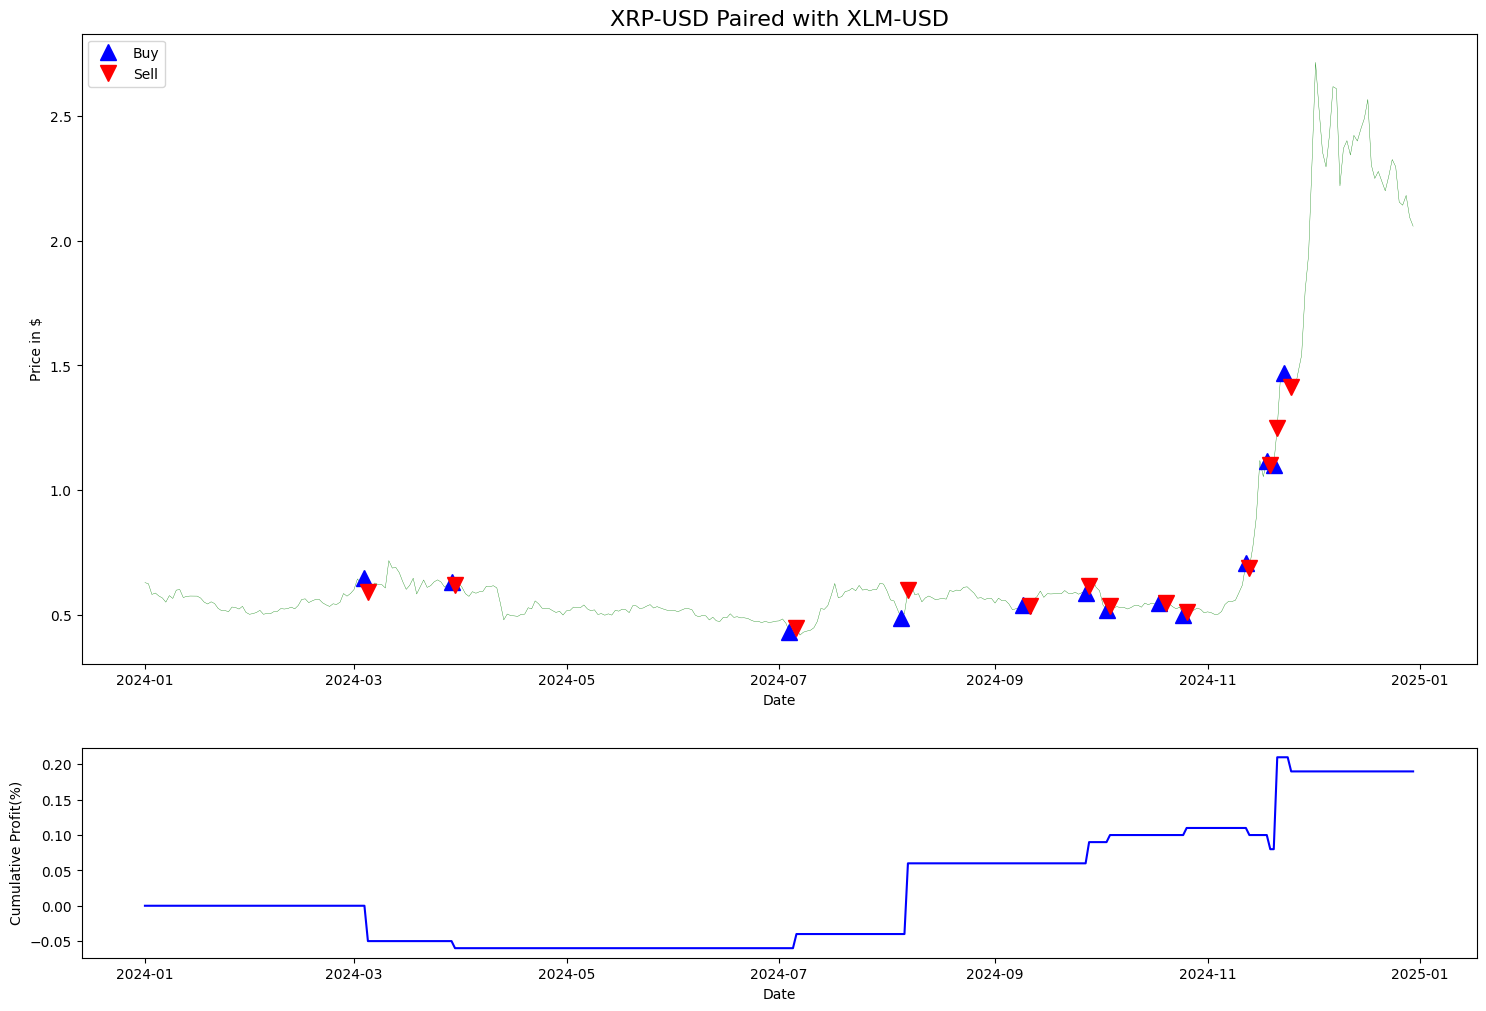

<Figure size 2000x1600 with 0 Axes>

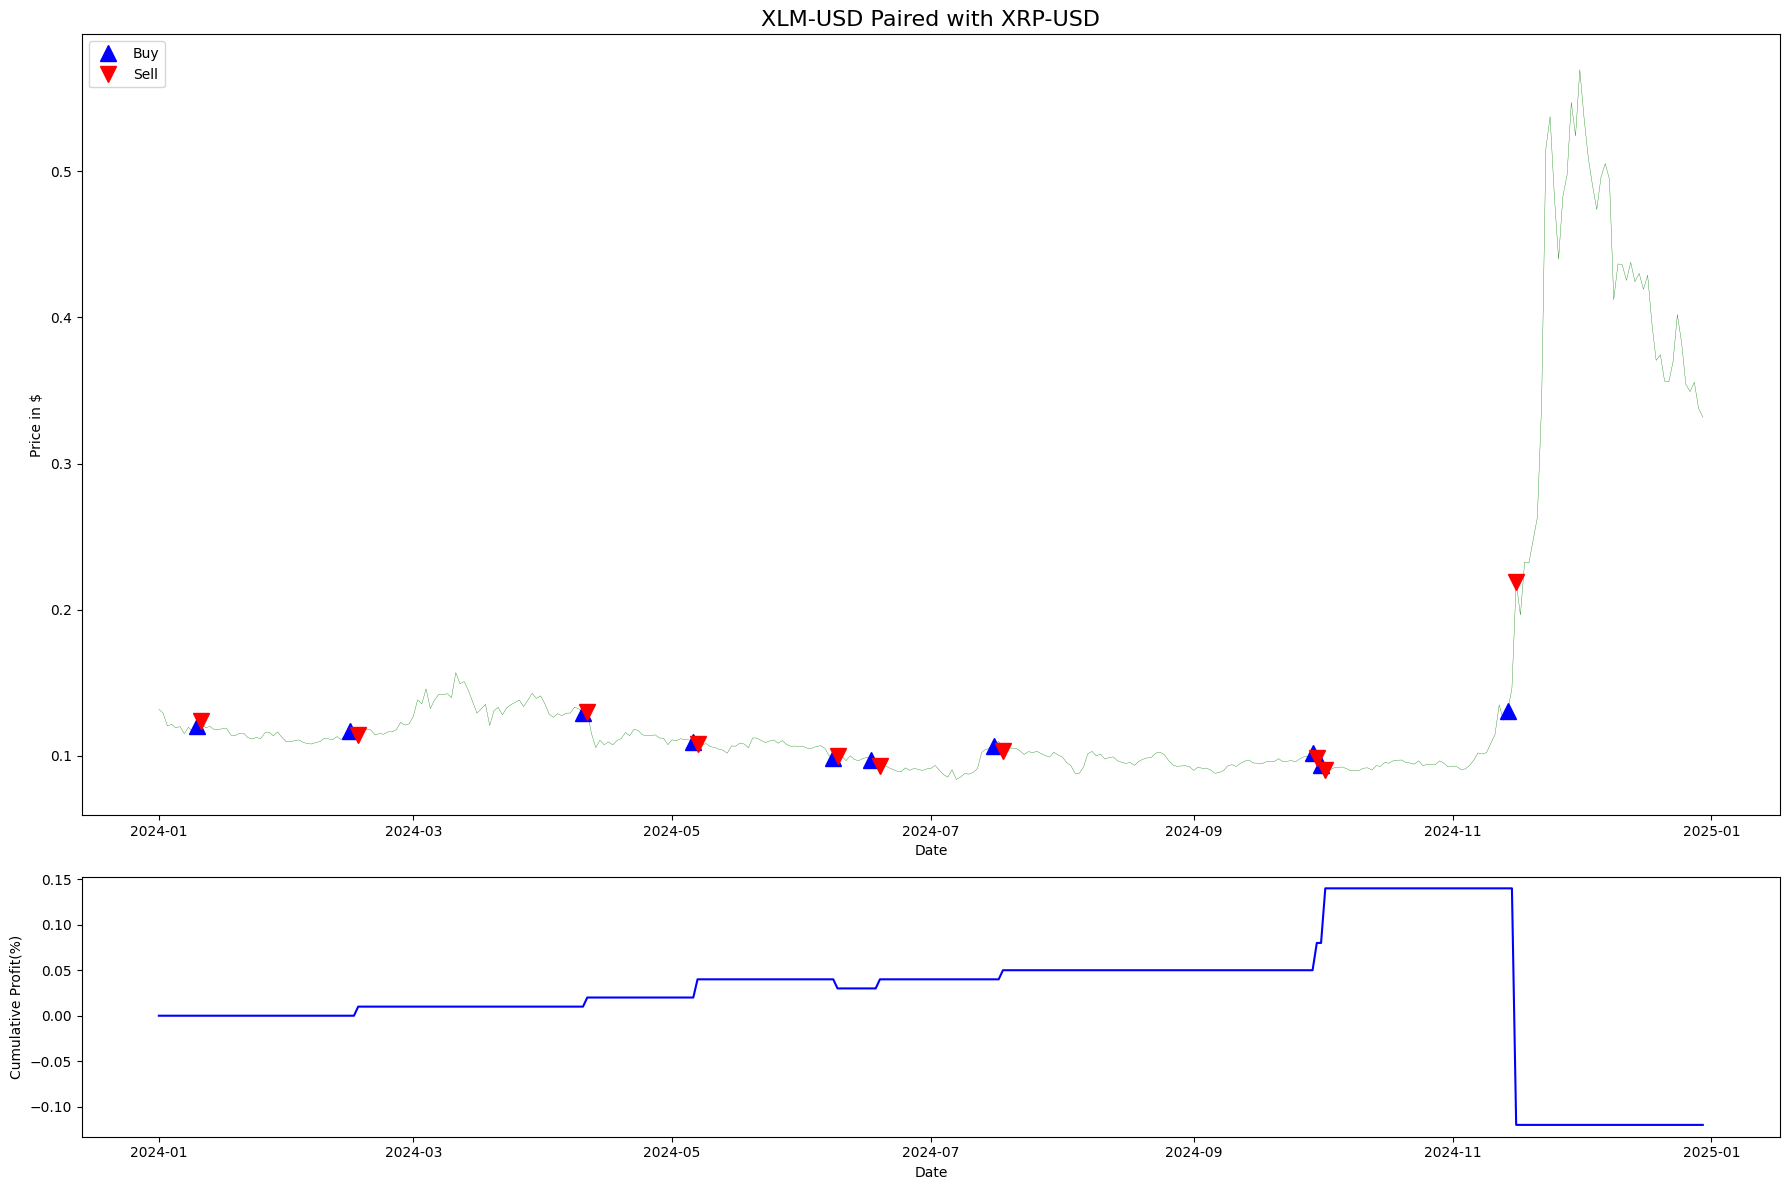

<Figure size 1200x600 with 0 Axes>

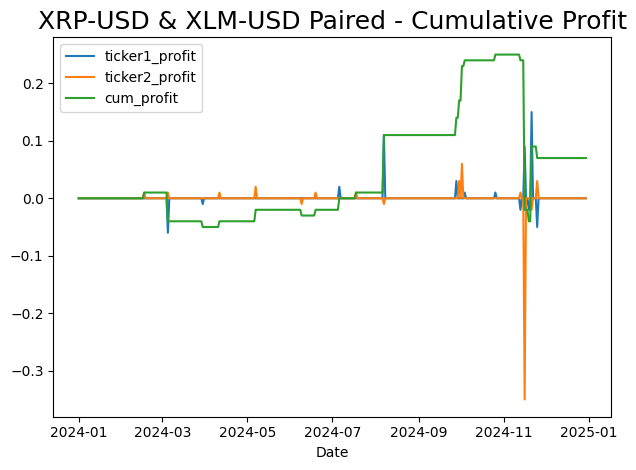

In [17]:
year = round(len(data)/252) if len(data)/252 < 1 else 1
# print(year)

coin_pairs = [['XRP-USD', 'XLM-USD']]

for i in range(len(coin_pairs)):   
    stock1 = data[coin_pairs[i][0]]
    stock2 = data[coin_pairs[i][1]]

    plt.figure(figsize=(20, 16))
    signals_df1 = signals_zscore_evolution(coin_pairs[i][0], coin_pairs[i][1], 2)
    profit_df1 = calculate_profit(signals_df1, stock1, stock2)
    ax1, _ = plot_strategy(stock1, signals_df1, profit_df1['cum_profit'])
    Returns(signals_df1, stock1, stock2, 2)
    risks(signals_df1, stock1, stock2, 2)
    win_rate(signals_df1, stock1, stock2)

    plt.figure(figsize=(20, 16))
    signals_df2 = signals_zscore_evolution(coin_pairs[i][1], coin_pairs[i][0], 2)
    profit_df2 = calculate_profit(signals_df2, stock2, stock1)
    ax2, _ = plot_strategy(stock2, signals_df2, profit_df2['cum_profit'])
    Returns(signals_df2, stock2, stock1, 2)
    risks(signals_df2, stock2, stock1, 2)
    win_rate(signals_df2, stock2, stock1)

    ax1.legend(loc='upper left', fontsize=10)
    ax1.set_title(f'{stock1.name} Paired with {stock2.name}', fontsize=16)
    ax2.legend(loc='upper left', fontsize=10)
    ax2.set_title(f'{stock2.name} Paired with {stock1.name}', fontsize=16)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    cumulative_profit_combined = profit_df1 + profit_df2
    ax2_combined = cumulative_profit_combined.plot(label='Profit')
    plt.legend(loc='upper left', fontsize=10)
    plt.title(f'{stock1.name} & {stock2.name} Paired - Cumulative Profit', fontsize=18)
    plt.tight_layout()
    plt.show()

# Conclusion and Improve

We conducted a basic pairs trading strategy in this project. If we want to effectively utilize this strategy, more cointegration testing is required. Additionally, there are several areas for potential improvement. 

For example, we could set a range for the z-score between 1 and 3 to identify which value yields the best results. Most of the time people set it to 2 or higher, but different case comes with different z_score. But there is potential risk is that it might get overfitting. 

Secondly, incorporating transaction fees would provide more precise outcomes. Transaction fee is something that kills all your profit, especially when the strategy need us to trade frequently, so adding that can help us understand what we really could earn. 

Lastly, we should adjust the prices of the two assets in the pair to avoid relying too heavily on the performance of a single asset. Some of the asset's price is 4 to 5 times than another asset, if we only buy 1 and sell 1, most of the profit or risk will rely on the asset which is more expensive than another asset in the pair. 


refrences: 
1. https://medium.com/call-for-atlas/pairs-trading-strategy-every-stock-needs-a-friend-e50723a1dc94
2. https://www.linkedin.com/pulse/momentum-reversion-poor-mans-trading-strategies-adam-darmanin-vhrif